In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime

#importing libraries for use later

In [113]:
plt.rcParams['figure.figsize'] = [24, 12]
#plt.rcParams['figure.dpi'] = 100

SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 50
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#determining the plot parameters

In [3]:
xls = pd.ExcelFile('online_retail_II.xlsx')
xls
#read excel file into variable

In [4]:
df1 = pd.read_excel(xls, 'Year 2009-2010', index_col = 'InvoiceDate')
df2 = pd.read_excel(xls, 'Year 2010-2011', index_col = 'InvoiceDate')

#use variable and read both sheets within excel file into separate dataframes

In [5]:
df1

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
2010-12-09 20:01:00,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom
2010-12-09 20:01:00,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom
2010-12-09 20:01:00,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom


In [6]:
df_combined = df1.append(df2)

#combining dataframes

df2

In [7]:
online_retail = pd.DataFrame(df_combined).reset_index()

#resetting index of dataframe

In [8]:
online_retail

#checking dataframe

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
1067367,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
1067368,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France
1067369,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France


In [9]:
online_retail = online_retail.set_index('InvoiceDate')


In [10]:
online_retail

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


In [11]:
online_retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [12]:
online_retail = online_retail[online_retail['Quantity']>0]
online_retail = online_retail[online_retail['Price']>0]

#filtering out price or quantity less than 0, which could mean refunds

In [13]:
online_retail.describe()

,Quantity,Price,Customer ID
count,1.041671e+06,1.041671e+06,805549.000000
mean,1.096345e+01,4.077038e+00,15331.954970
std,1.265149e+02,5.144898e+01,1696.737039
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13982.000000
50%,3.000000e+00,2.100000e+00,15271.000000
75%,1.000000e+01,4.130000e+00,16805.000000
max,8.099500e+04,2.511109e+04,18287.000000


In [14]:
online_retail.to_csv('online_retail')

#exporting dataframe into CSV file

In [15]:
online_retail_v1 = pd.read_csv("online_retail.csv", index_col = ["InvoiceDate"], parse_dates = ['InvoiceDate'], low_memory = False)

#reading CSV file into dataframe, setting column as DateTime format

In [16]:
online_retail_v1['Revenue'] = online_retail_v1['Quantity'] * online_retail_v1['Price']

#computing a new 'Revenue' feature with 2 exsitng features within the Dataframe

(array([1.041619e+06, 3.800000e+01, 7.000000e+00, 4.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00]),
 array([1.00000e+00, 4.05070e+03, 8.10040e+03, 1.21501e+04, 1.61998e+04,
        2.02495e+04, 2.42992e+04, 2.83489e+04, 3.23986e+04, 3.64483e+04,
        4.04980e+04, 4.45477e+04, 4.85974e+04, 5.26471e+04, 5.66968e+04,
        6.07465e+04, 6.47962e+04, 6.88459e+04, 7.28956e+04, 7.69453e+04,
        8.09950e+04]),
 <a list of 20 Patch objects>)

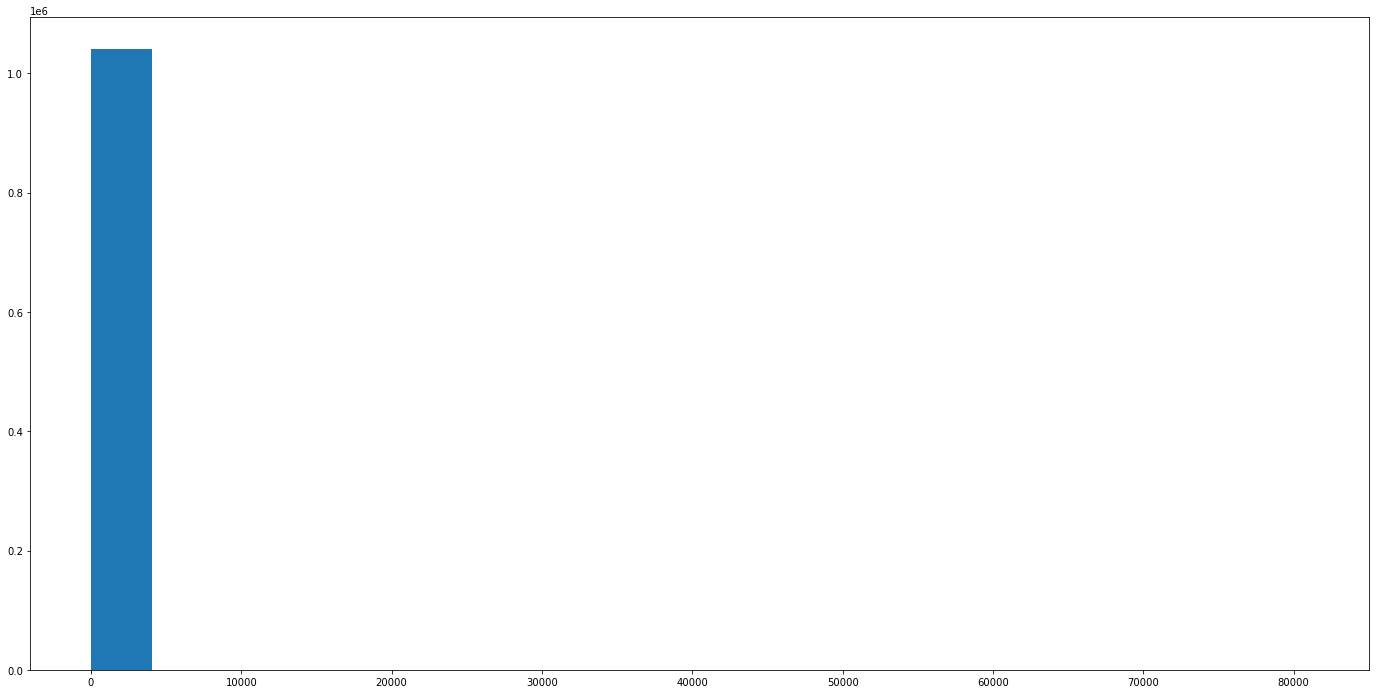

In [17]:
plt.hist(online_retail_v1['Quantity'], bins = 20)

#plotting original histogram

In [18]:
online_retail_v1['Quantity_log'] = np.log(online_retail_v1['Quantity'])

#normalising figures so chart makes more sense

Text(0.5, 1.0, 'Fig 1: Log-scaled Historgram (Quantity)')

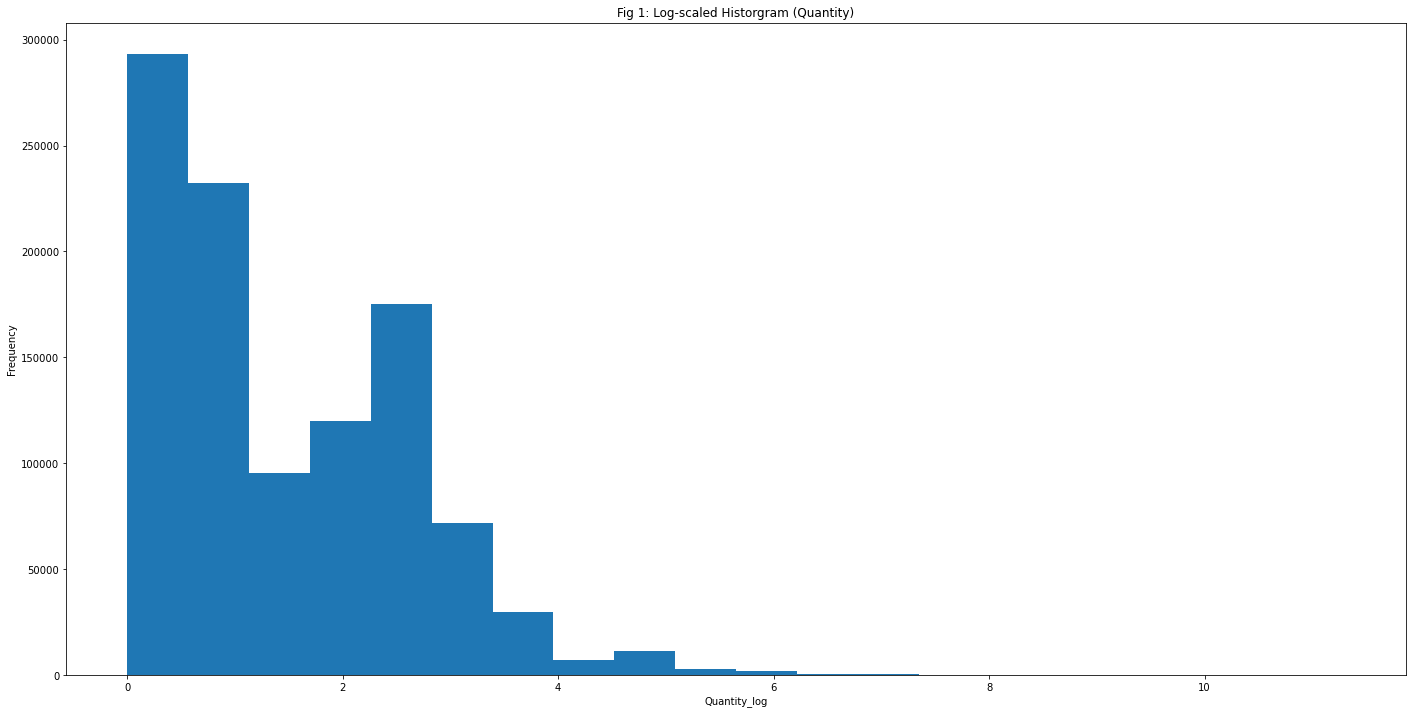

In [19]:
_ = plt.hist(online_retail_v1['Quantity_log'], bins = 20)
plt.xlabel('Quantity_log')
plt.ylabel('Frequency')
plt.title('Fig 1: Log-scaled Historgram (Quantity)')

#plotting normalised data

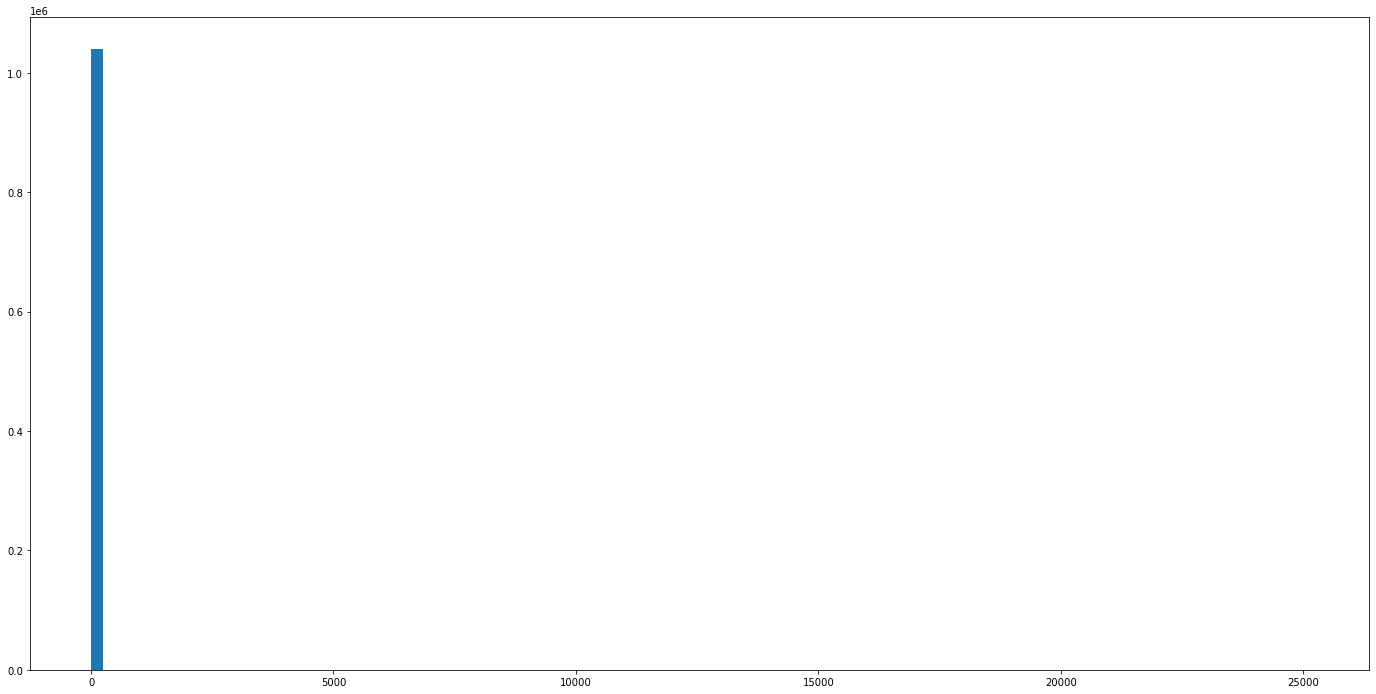

In [20]:
_ = plt.hist(online_retail_v1['Price'], bins = 100)

In [21]:
online_retail_v1['Price_log'] = np.log(online_retail_v1['Price'])

Text(0.5, 1.0, 'Fig 2: Log-scaled Historgram (Price)')

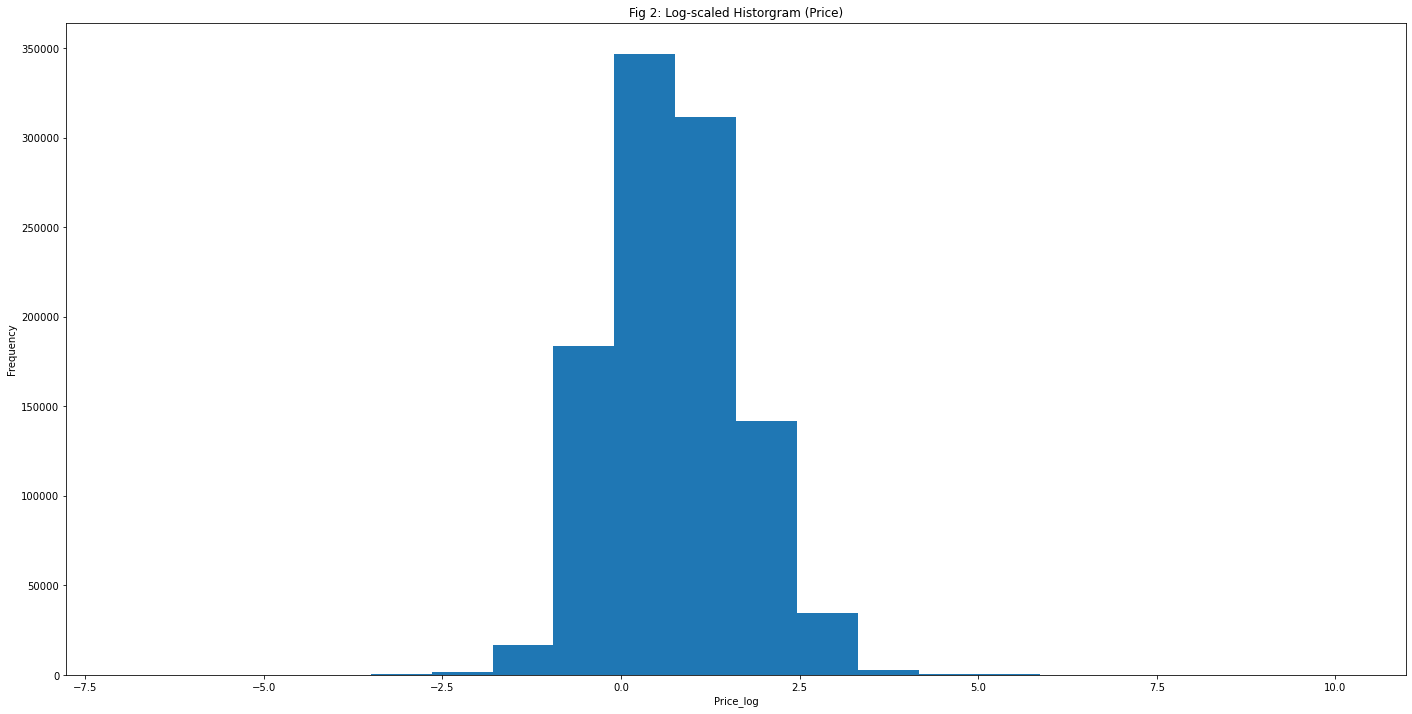

In [22]:
plt.hist(online_retail_v1['Price_log'], bins = 20)
plt.xlabel('Price_log')
plt.ylabel('Frequency')
plt.title('Fig 2: Log-scaled Historgram (Price)')

(array([1.041656e+06, 1.100000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]),
 array([1.00000000e-03, 8.42348095e+03, 1.68469609e+04, 2.52704409e+04,
        3.36939208e+04, 4.21174008e+04, 5.05408807e+04, 5.89643607e+04,
        6.73878406e+04, 7.58113206e+04, 8.42348005e+04, 9.26582805e+04,
        1.01081760e+05, 1.09505240e+05, 1.17928720e+05, 1.26352200e+05,
        1.34775680e+05, 1.43199160e+05, 1.51622640e+05, 1.60046120e+05,
        1.68469600e+05]),
 <a list of 20 Patch objects>)

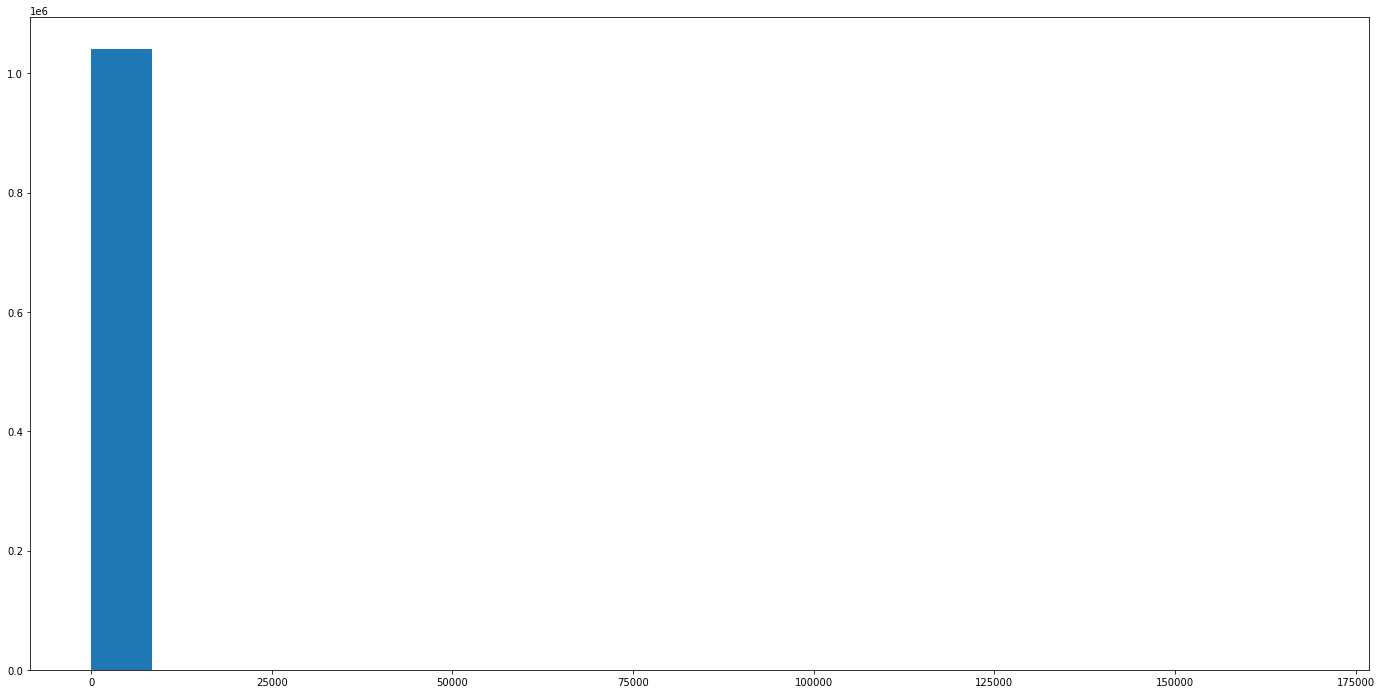

In [23]:
plt.hist(online_retail_v1['Revenue'],bins = 20)

In [24]:
online_retail_v1['Revenue_log'] = np.log(online_retail_v1['Revenue'])

Text(0.5, 1.0, 'Fig 3: Log-scaled Historgram (Revenue)')

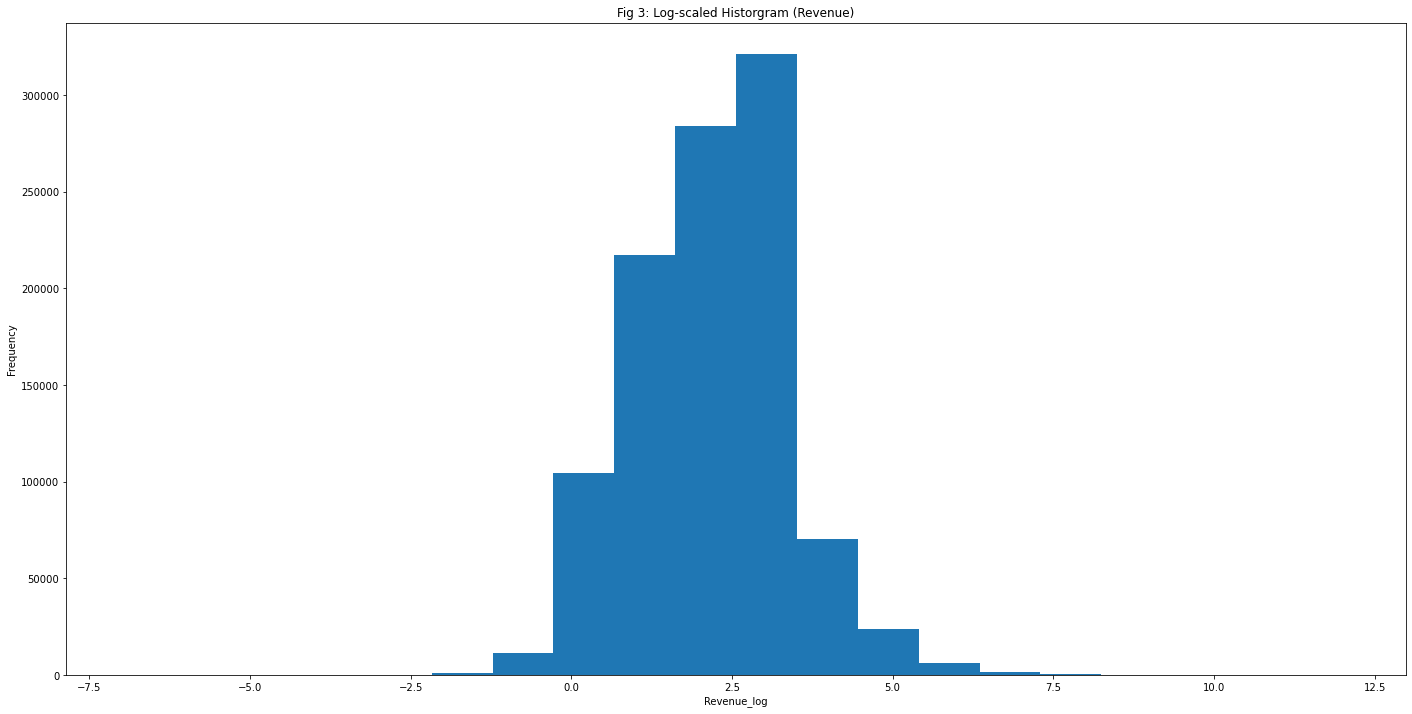

In [25]:
plt.hist(online_retail_v1['Revenue_log'], bins = 20)
plt.xlabel('Revenue_log')
plt.ylabel('Frequency')
plt.title('Fig 3: Log-scaled Historgram (Revenue)')

Text(0.5, 1.0, 'Fig 4: Quantity sold over time')

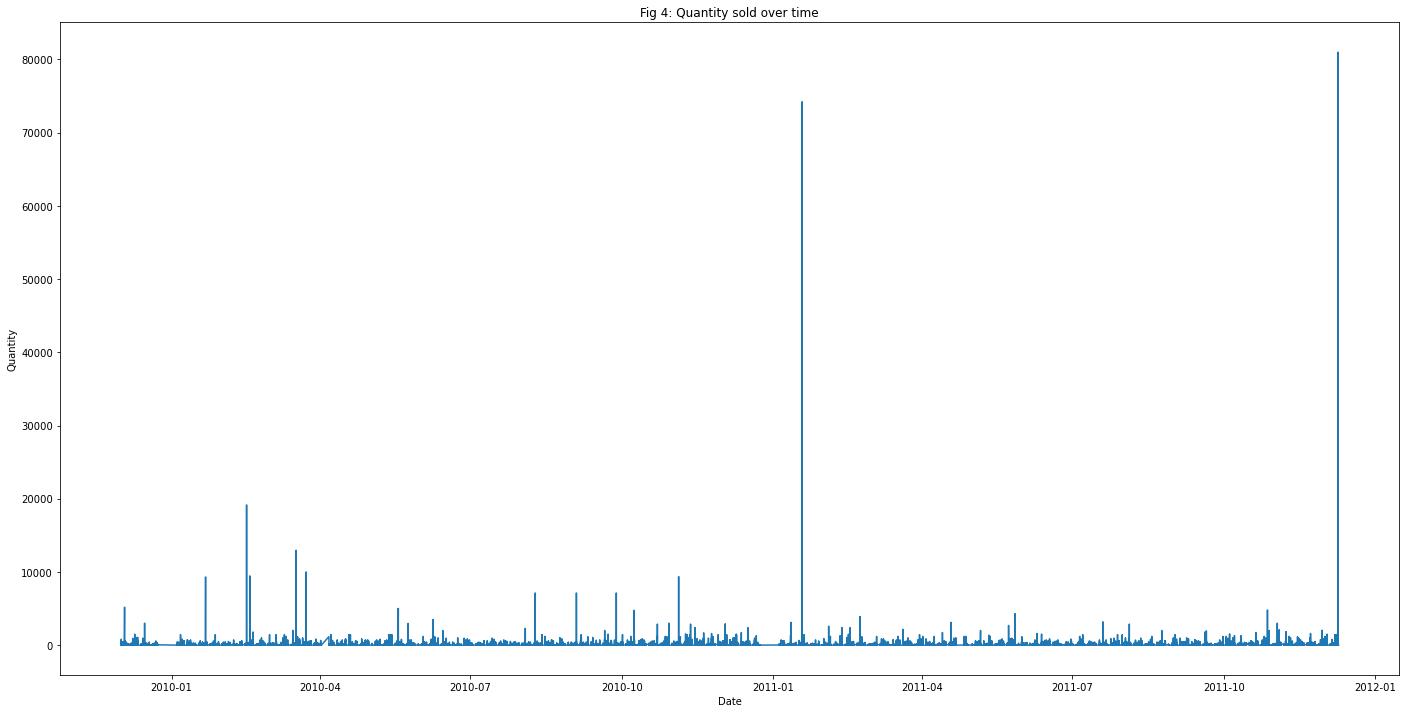

In [26]:
plt.plot(online_retail_v1['Quantity'])
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title('Fig 4: Quantity sold over time')

Text(0.5, 1.0, 'Fig 5: Price versus Quantity')

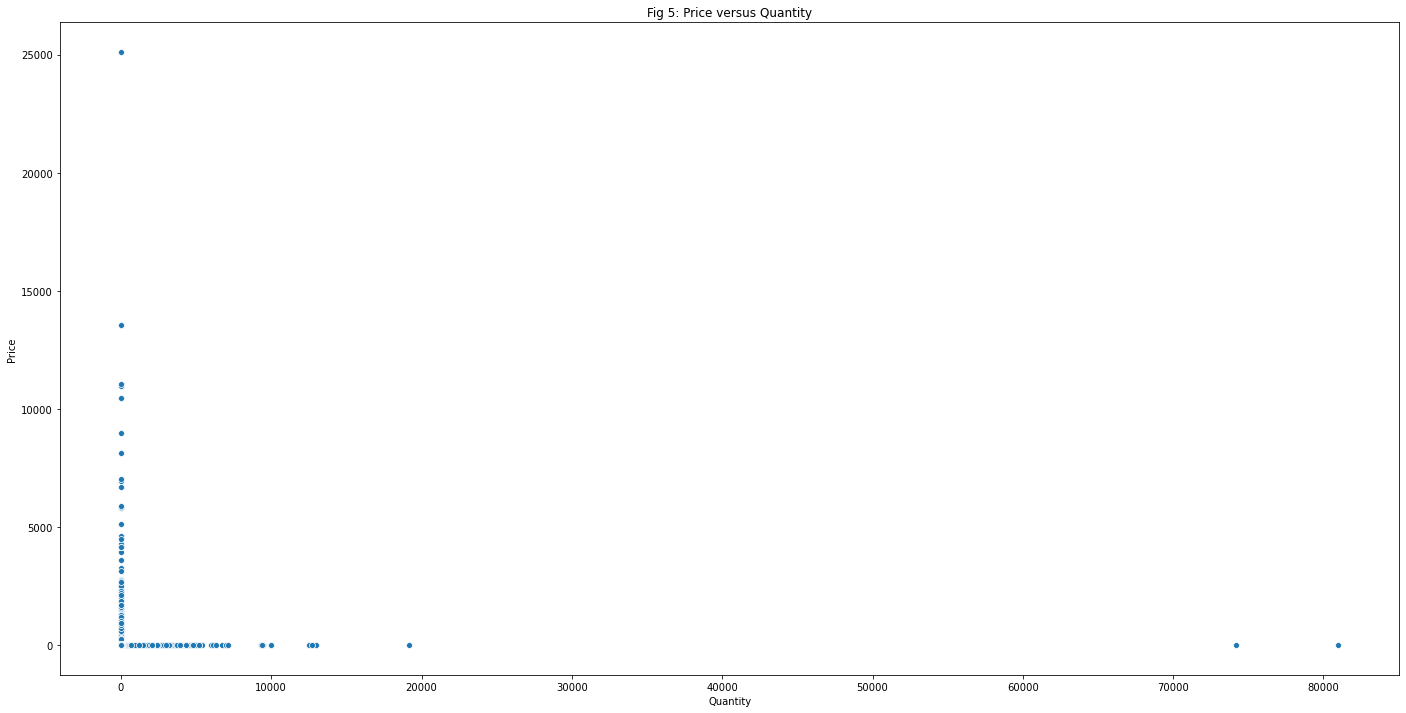

In [27]:
sns.scatterplot(data = online_retail_v1, x ='Quantity', y = 'Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Fig 5: Price versus Quantity')

Text(0.5, 1.0, 'Fig 5: Price_log versus Quantity_log')

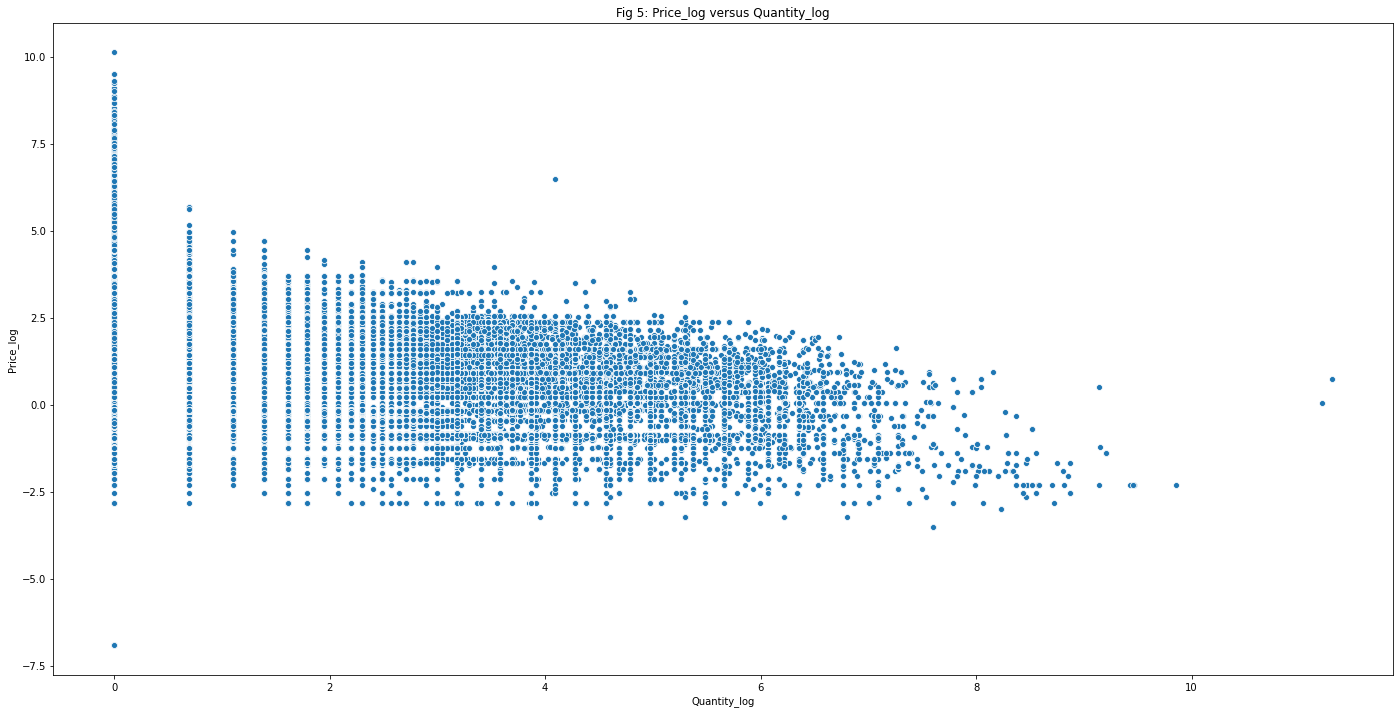

In [28]:
sns.scatterplot(data = online_retail_v1, x ='Quantity_log', y = 'Price_log')

plt.xlabel('Quantity_log')
plt.ylabel('Price_log')
plt.title('Fig 5: Price_log versus Quantity_log')


In [29]:
online_retail_v1.to_csv('online_retail_v1')

In [30]:
online_retail_v1 = pd.read_csv('online_retail_v1', parse_dates = ['InvoiceDate'], index_col = ['InvoiceDate'], low_memory = False)

In [31]:
online_retail_v1

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,Quantity_log,Price_log,Revenue_log
InvoiceDate,,,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,2.484907,1.938742,4.423648
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,2.484907,1.909543,4.394449
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,2.484907,1.909543,4.394449
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,3.871201,0.741937,4.613138
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,3.178054,0.223144,3.401197
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,1.791759,0.741937,2.533697
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,1.386294,1.423108,2.809403
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,1.386294,1.423108,2.809403


In [32]:
num_invoice = online_retail_v1[['Invoice','Price']].groupby(['Invoice']).count().sort_values(by = 'Price', ascending = False)
num_invoice = num_invoice.rename(columns = {'Price': 'Invoice_Count'})
num_invoice

,Invoice_Count
Invoice,
537434,1350
538071,1302
537638,1202
537237,1194
536876,1186
...,...
568914,1
568913,1
519808,1


In [33]:
num_customer = online_retail_v1[['Customer ID', 'Quantity', 'Revenue']].groupby(['Customer ID']).sum().sort_values('Revenue', ascending = False).rename(columns = {'Price':'Customer_count'})
num_customer

,Quantity,Revenue
Customer ID,,
18102.0,188340,608821.65
14646.0,367193,528602.52
14156.0,165992,313946.37
14911.0,149987,295972.63
17450.0,84720,246973.09
...,...,...
15913.0,3,6.30
14792.0,2,6.20
16738.0,3,3.75


In [34]:
num_country = online_retail_v1[['Country','Price']].groupby(['Country']).count().sort_values('Price',ascending = False).rename(columns = {'Price':'Country_count'})
num_country

,Country_count
Country,
United Kingdom,958502
EIRE,17349
Germany,16694
France,13940
Netherlands,5088
Spain,3719
Switzerland,3136
Belgium,3068
Portugal,2562


In [35]:
num_description = online_retail_v1[['Description','Price']].groupby('Description').count().sort_values('Price', ascending = False).rename(columns = {'Price':'Description_counts'})
num_description

,Description_counts
Description,
WHITE HANGING HEART T-LIGHT HOLDER,5778
REGENCY CAKESTAND 3 TIER,4061
JUMBO BAG RED RETROSPOT,3391
ASSORTED COLOUR BIRD ORNAMENT,2938
PARTY BUNTING,2740
...,...
CREAM KNITTED HEN,1
WOODEN HEART CHRISTMAS SCANDISPOT,1
GOLD CHRISTMAS STOCKING DECORATION,1


In [36]:
online_retail_v1[['Country','Revenue']].groupby(['Country']).sum().sort_values(by = 'Revenue', ascending = False)

#Grouping by country and summing up by Revenue. Sorting values in Descending value by Revenue. Only showing the Country and Revenue columns

,Revenue
Country,
United Kingdom,1.787135e+07
EIRE,6.644318e+05
Netherlands,5.542323e+05
Germany,4.312625e+05
France,3.569446e+05
Australia,1.699681e+05
Spain,1.091785e+05
Switzerland,1.010113e+05
Sweden,9.190372e+04


In [37]:
online_retail_resampled = online_retail_v1.resample('M').sum()[['Quantity','Revenue']]
online_retail_resampled

#resampling dataframe by month and only retaining Quantity and Revenue columns

,Quantity,Revenue
InvoiceDate,,
2009-12-31,426981,825685.760
2010-01-31,391525,652708.502
2010-02-28,382782,553713.306
2010-03-31,527401,833570.131
2010-04-30,368198,681528.992
2010-05-31,397206,659858.860
2010-06-30,408636,752270.140
2010-07-31,338920,650712.940
2010-08-31,473420,697274.910


Text(0.5, 1.0, 'Fig 7: Quantity sold by month')

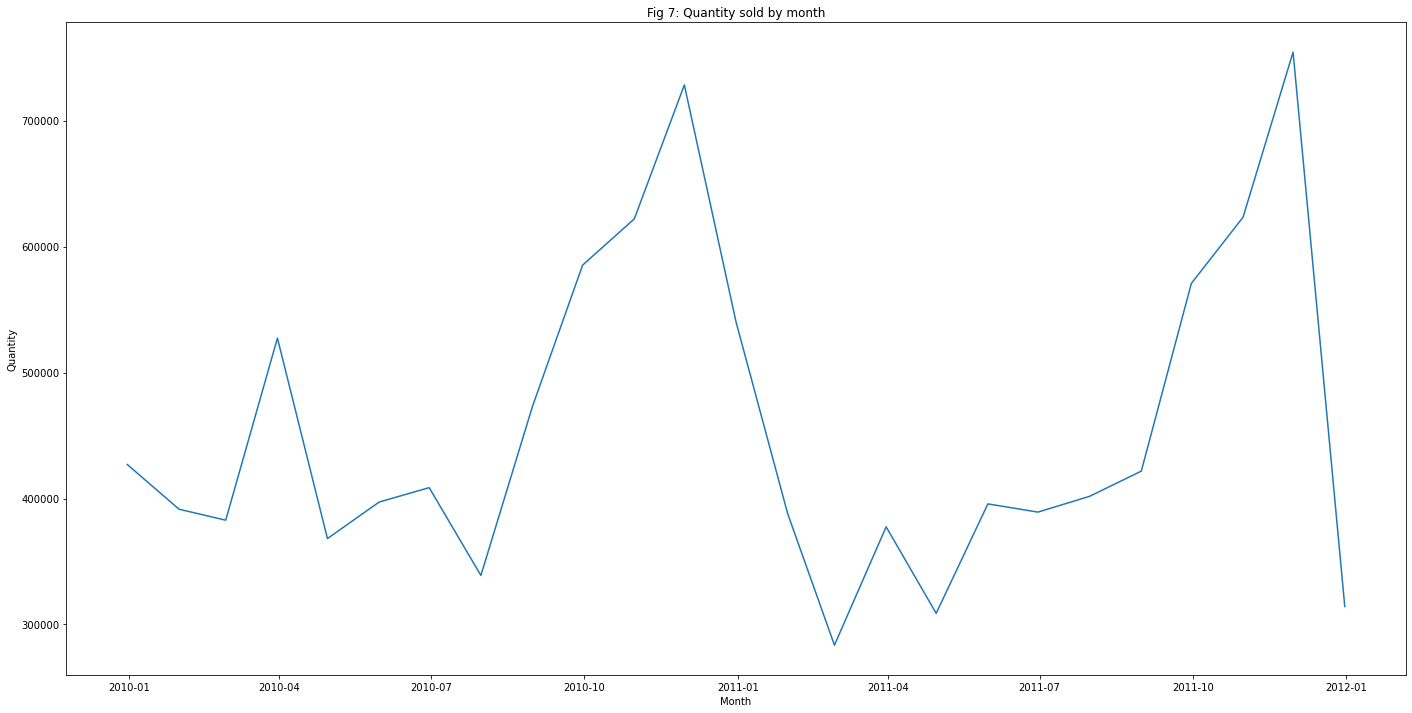

In [38]:
plt.plot(online_retail_resampled['Quantity'])
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Fig 7: Quantity sold by month')

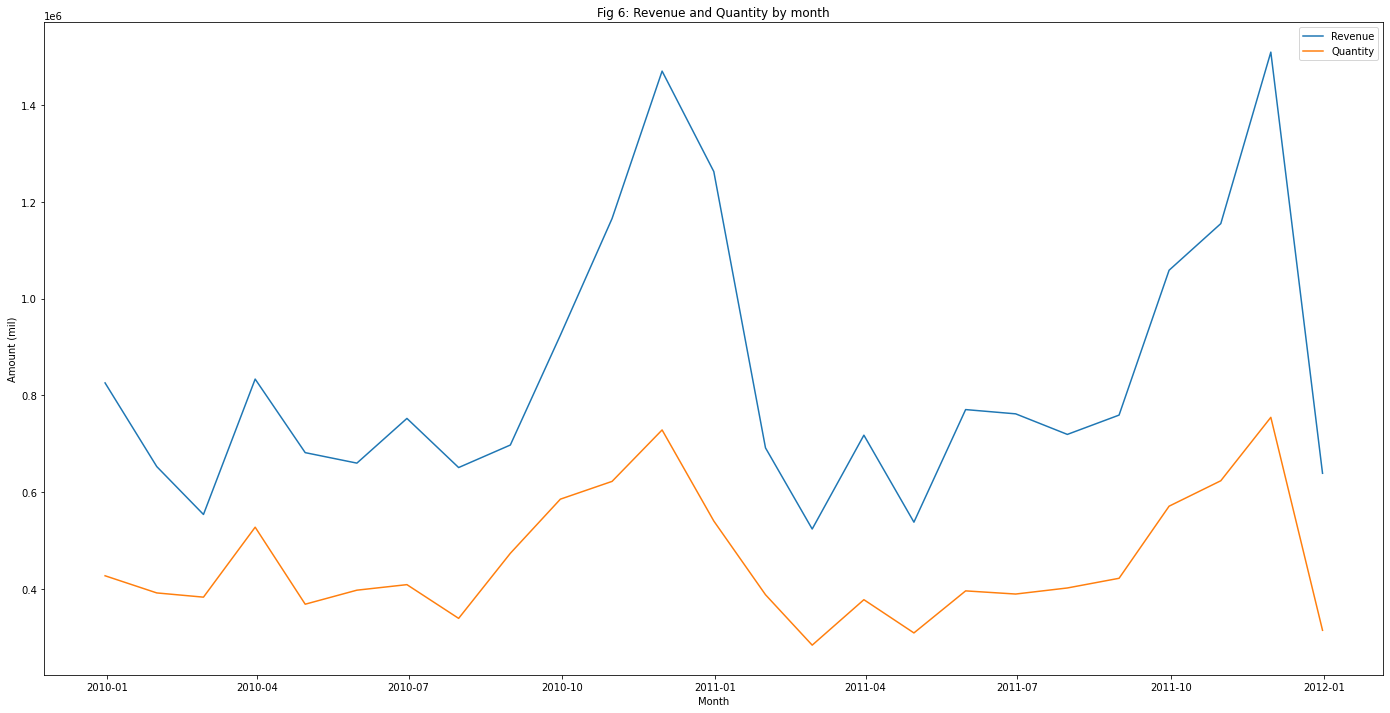

In [39]:
plt.plot(online_retail_resampled[['Revenue','Quantity']])
plt.xlabel('Month')
plt.ylabel('Amount (mil)')
plt.title('Fig 6: Revenue and Quantity by month')
plt.legend(['Revenue', 'Quantity'])

In [40]:
online_retail_resampled.index.min()

Timestamp('2009-12-31 00:00:00', freq='M')

In [41]:
online_retail_resampled.index.max()

Timestamp('2011-12-31 00:00:00', freq='M')

In [42]:
online_retail_resampled

,Quantity,Revenue
InvoiceDate,,
2009-12-31,426981,825685.760
2010-01-31,391525,652708.502
2010-02-28,382782,553713.306
2010-03-31,527401,833570.131
2010-04-30,368198,681528.992
2010-05-31,397206,659858.860
2010-06-30,408636,752270.140
2010-07-31,338920,650712.940
2010-08-31,473420,697274.910


In [43]:
description_list = online_retail_v1['Description'].drop_duplicates().values.tolist()
#to convert description column into list for wordcloud

In [44]:
description_lower1 = [x.lower() for x in description_list]

#to convert all elements in list into lowercase using the for method

In [45]:
description_lower2 = list(map(lambda x:x.lower(), description_list))
description_lower2
#using the list and map functions to convert all elements in a list into lowercase

['15cm christmas glass ball 20 lights',
 'pink cherry lights',
 ' white cherry lights',
 'record frame 7" single size ',
 'strawberry ceramic trinket box',
 'pink doughnut trinket pot ',
 'save the planet mug',
 'fancy font home sweet home doormat',
 'cat bowl ',
 'dog bowl , chasing ball design',
 'heart measuring spoons large',
 'lunchbox with cutlery fairy cakes ',
 'door mat black flock ',
 'love building block word',
 'home building block word',
 'assorted colour bird ornament',
 ' peace wooden block letters',
 'christmas craft white fairy ',
 'heart ivory trellis large',
 'heart filigree dove large',
 'full english breakfast plate',
 'pizza plate in box',
 'black diner wall clock',
 'set of 3 black flying ducks',
 'area patrolled metal sign',
 'please one person  metal sign',
 'bath building block word',
 'classic white frame',
 'small marshmallows pink bowl',
 'biscuits small bowl light blue',
 'scottie dog hot water bottle',
 'christmas craft heart decorations',
 'christmas cra

In [46]:
description_string = ' '.join(description_lower2)
description_string

'15cm christmas glass ball 20 lights pink cherry lights  white cherry lights record frame 7" single size  strawberry ceramic trinket box pink doughnut trinket pot  save the planet mug fancy font home sweet home doormat cat bowl  dog bowl , chasing ball design heart measuring spoons large lunchbox with cutlery fairy cakes  door mat black flock  love building block word home building block word assorted colour bird ornament  peace wooden block letters christmas craft white fairy  heart ivory trellis large heart filigree dove large full english breakfast plate pizza plate in box black diner wall clock set of 3 black flying ducks area patrolled metal sign please one person  metal sign bath building block word classic white frame small marshmallows pink bowl biscuits small bowl light blue scottie dog hot water bottle christmas craft heart decorations christmas craft heart stocking  party cone christmas decoration  peace small wood letters joy large wood letters cinammon & orange wreath euca

In [47]:
?WordCloud

#observing the parameters of WordCloud

In [48]:
stopwords = set(STOPWORDS)

#setting a variable for stopwords which will be a list of common words in the english language that will be excluded from the wordclod

In [49]:
wordcloud = WordCloud(stopwords = stopwords, max_words = 50).generate(description_string)

#generating a wordcloud object

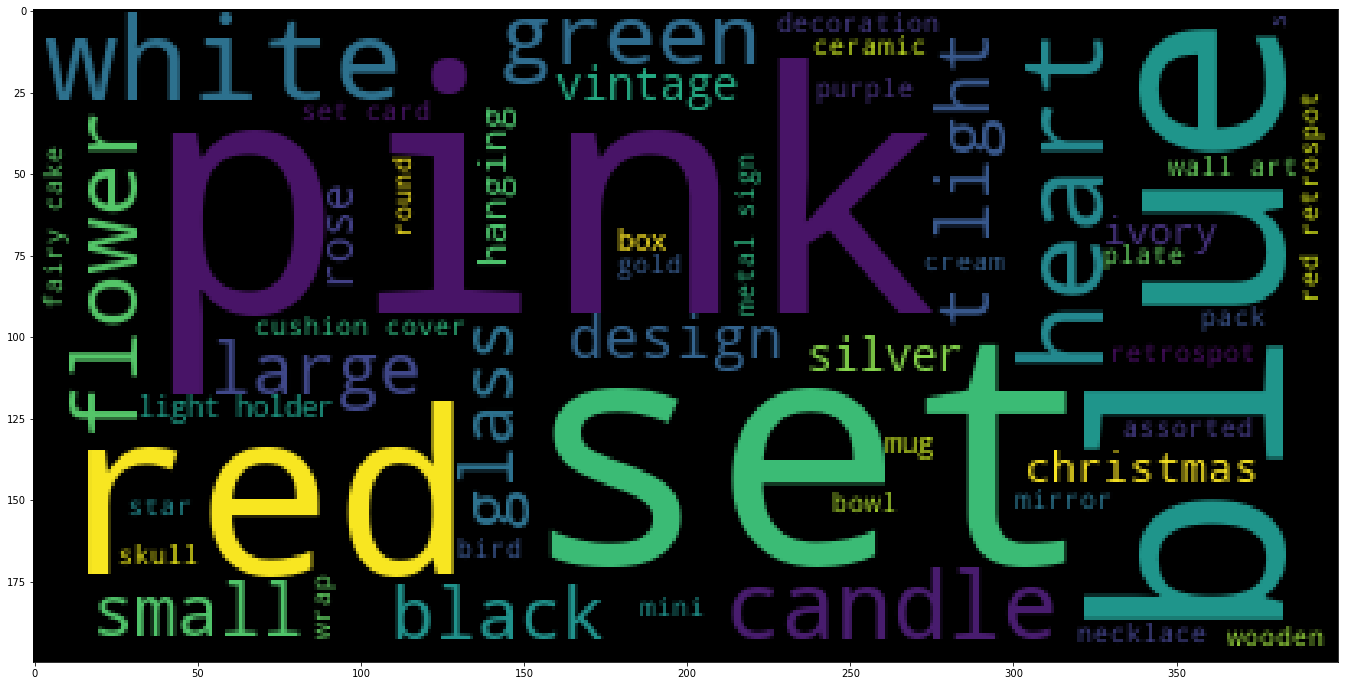

In [50]:
plt.imshow(wordcloud)

#showing the wordcloud object using matplotlib.pyplot.imshow()

In [51]:
online_retail_v2 = pd.read_csv("online_retail.csv", low_memory = False)

#reading CSV file into dataframe, setting column as DateTime format

In [52]:
online_retail_v2['Revenue'] = online_retail_v2['Price'] * online_retail_v2['Quantity']
online_retail_v2

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1041666,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
1041667,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
1041668,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60
1041669,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85


In [53]:
online_retail_v2 = online_retail_v2[online_retail_v2['Customer ID'].notna()]
online_retail_v2

#drop rows without customer ID

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1041666,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
1041667,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
1041668,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60
1041669,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85


In [54]:
online_retail_v2['Customer ID'] = online_retail_v2['Customer ID'].astype(str)
online_retail_v2

#convert Customer ID from float into string

<ipython-input-54-22d8371db630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_v2['Customer ID'] = online_retail_v2['Customer ID'].astype(str)


,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1041666,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
1041667,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
1041668,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60
1041669,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85


In [55]:
online_retail_v2['InvoiceDate'] = online_retail_v2['InvoiceDate'].astype('datetime64[ns]')
online_retail_v2['Customer ID'] = online_retail_v2['Customer ID'].astype('str')
online_retail_v2

<ipython-input-55-6d65ed10b927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_v2['InvoiceDate'] = online_retail_v2['InvoiceDate'].astype('datetime64[ns]')
<ipython-input-55-6d65ed10b927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_v2['Customer ID'] = online_retail_v2['Customer ID'].astype('str')


,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1041666,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
1041667,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
1041668,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60
1041669,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85


In [56]:
today = pd.to_datetime("2012-01-01")
today

Timestamp('2012-01-01 00:00:00')

In [57]:
list = [(today - x).days for x in online_retail_v2['InvoiceDate']]
list

[760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760,
 760

In [58]:
online_retail_v2['days_since_today'] = list
online_retail_v2

<ipython-input-58-462adeb6eab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_v2['days_since_today'] = list


,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,days_since_today
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,760
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,760
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,760
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,760
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,760
...,...,...,...,...,...,...,...,...,...,...
1041666,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,22
1041667,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,22
1041668,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,22
1041669,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85,22


In [59]:
recency = pd.DataFrame(online_retail_v2.groupby('Customer ID')['days_since_today'].min())
recency = recency.rename(columns = {'days_since_today': 'Recency'})
recency

,Recency
Customer ID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18283.0,25
18284.0,453
18285.0,682


In [60]:
online_retail_drop_duplicates = online_retail_v2.drop_duplicates(subset = 'Invoice')
online_retail_drop_duplicates

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,days_since_today
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,760
8,2009-12-01 07:46:00,489435,22350,CAT BOWL,12,2.55,13085.0,United Kingdom,30.60,760
12,2009-12-01 09:06:00,489436,48173C,DOOR MAT BLACK FLOCK,10,5.95,13078.0,United Kingdom,59.50,760
31,2009-12-01 09:08:00,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2.10,15362.0,United Kingdom,12.60,760
54,2009-12-01 09:24:00,489438,21329,DINOSAURS WRITING SET,28,0.98,18102.0,United Kingdom,27.44,760
...,...,...,...,...,...,...,...,...,...,...
1041626,2011-12-09 12:23:00,581583,20725,LUNCH BAG RED RETROSPOT,40,1.45,13777.0,United Kingdom,58.00,22
1041628,2011-12-09 12:25:00,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,0.72,13777.0,United Kingdom,51.84,22
1041630,2011-12-09 12:31:00,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,0.39,15804.0,United Kingdom,4.68,22
1041651,2011-12-09 12:49:00,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113.0,United Kingdom,23.60,22


In [61]:
frequency = pd.DataFrame(online_retail_drop_duplicates['Customer ID'].value_counts())
frequency = frequency.rename(columns = {'Customer ID': 'Frequency'})
frequency = frequency.rename_axis('Customer ID')
frequency

,Frequency
Customer ID,
14911.0,398
12748.0,336
17841.0,211
15311.0,208
13089.0,203
...,...
18007.0,1
17304.0,1
18234.0,1


In [62]:
monetary = pd.DataFrame(online_retail_v2.groupby('Customer ID')['Revenue'].sum()).rename(columns = {'Revenue': 'Monetary'})
monetary

,Monetary
Customer ID,
12346.0,77556.46
12347.0,5633.32
12348.0,2019.40
12349.0,4428.69
12350.0,334.40
...,...
18283.0,2736.65
18284.0,461.68
18285.0,427.00


In [63]:
RFM = pd.merge(pd.merge(recency, frequency, on = 'Customer ID'),monetary, on = 'Customer ID')
RFM

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,347,12,77556.46
12347.0,24,8,5633.32
12348.0,97,5,2019.40
12349.0,40,4,4428.69
12350.0,332,1,334.40
...,...,...,...
18283.0,25,22,2736.65
18284.0,453,1,461.68
18285.0,682,1,427.00


In [64]:
RFM.to_csv('RFM')

In [65]:
recency_score = [5,4,3,2,1]

In [66]:
RFM['RecencyScore'] = pd.qcut(RFM['Recency'], 5, labels = recency_score)
RFM

,Recency,Frequency,Monetary,RecencyScore
Customer ID,,,,
12346.0,347,12,77556.46,2
12347.0,24,8,5633.32,5
12348.0,97,5,2019.40,3
12349.0,40,4,4428.69,5
12350.0,332,1,334.40,2
...,...,...,...,...
18283.0,25,22,2736.65,5
18284.0,453,1,461.68,1
18285.0,682,1,427.00,1


In [67]:
FrequencyRank = RFM['Frequency'].rank(method = 'first')

In [68]:
frequency_score = [1,2,3,4,5]

In [69]:
RFM['FrequencyScore'] = pd.qcut(FrequencyRank, 5, labels = frequency_score) 
RFM

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
Customer ID,,,,,
12346.0,347,12,77556.46,2,5
12347.0,24,8,5633.32,5,4
12348.0,97,5,2019.40,3,4
12349.0,40,4,4428.69,5,3
12350.0,332,1,334.40,2,1
...,...,...,...,...,...
18283.0,25,22,2736.65,5,5
18284.0,453,1,461.68,1,2
18285.0,682,1,427.00,1,2


In [70]:
monetary_score = frequency_score.copy()

In [71]:
RFM['MonetaryScore'] = pd.qcut(RFM['Monetary'], 5, monetary_score)
RFM.dtypes

Recency              int64
Frequency            int64
Monetary           float64
RecencyScore      category
FrequencyScore    category
MonetaryScore     category
dtype: object

In [72]:
RFM['RFM'] = RFM['RecencyScore'].astype('str') + RFM['FrequencyScore'].astype('str') + RFM['MonetaryScore'].astype('str')
RFM['RFM'] = RFM['RFM'].astype('str')
RFM

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM
Customer ID,,,,,,,
12346.0,347,12,77556.46,2,5,5,255
12347.0,24,8,5633.32,5,4,5,545
12348.0,97,5,2019.40,3,4,4,344
12349.0,40,4,4428.69,5,3,5,535
12350.0,332,1,334.40,2,1,2,212
...,...,...,...,...,...,...,...
18283.0,25,22,2736.65,5,5,4,554
18284.0,453,1,461.68,1,2,2,122
18285.0,682,1,427.00,1,2,2,122


In [73]:
RFM_segment = []

#initialise an empty list for client segments v1

#Hibernating: 11, 12, 21, 22
#At Risk: 13, 14, 23, 24
#Can't Lose: 15, 25
#About to Sleep: 31, 32
#Need Attention: 33
#Loyal Customers: 34, 35, 44, 45
#Promising: 41
#New Customers: 51
#Potential Loyalists: 42, 43, 52, 53
#Champions: 54, 55

In [74]:
RFM['Category'] = [(x[0:2]) for x in RFM['RFM']]
RFM['Category'] = RFM['Category'].astype('str')
RFM.dtypes

Recency              int64
Frequency            int64
Monetary           float64
RecencyScore      category
FrequencyScore    category
MonetaryScore     category
RFM                 object
Category            object
dtype: object

In [75]:
for x in RFM['Category']:
    if x in ['11', '12', '21', '22']:
        RFM_segment.append('Hibernating')
    elif x in ['13', '14', '23', '24']:
        RFM_segment.append('At Risk')
    elif x in ['15', '25']:
        RFM_segment.append("Can't Lose")
    elif x in ['31', '32']:
        RFM_segment.append('About to Sleep')
    elif x in ['33']:
        RFM_segment.append('Need Attention')
    elif x in ['34', '35', '44', '45']:
        RFM_segment.append('Loyal Customers')
    elif x in ['41']:
        RFM_segment.append('Promising')
    elif x in ['51']:
        RFM_segment.append('New Customers')
    elif x in ['42', '43', '52', '53']:
        RFM_segment.append('Potential Loyalists')
    else:
        RFM_segment.append('Champions')
RFM_segment

["Can't Lose",
 'Champions',
 'Loyal Customers',
 'Potential Loyalists',
 'Hibernating',
 'Hibernating',
 'Loyal Customers',
 'Hibernating',
 'Hibernating',
 'Hibernating',
 'Loyal Customers',
 'Potential Loyalists',
 'Champions',
 'Loyal Customers',
 'Loyal Customers',
 'At Risk',
 'Champions',
 'About to Sleep',
 'Potential Loyalists',
 'Hibernating',
 'Hibernating',
 'New Customers',
 'Hibernating',
 'At Risk',
 'Loyal Customers',
 'Loyal Customers',
 'Need Attention',
 'At Risk',
 'Potential Loyalists',
 'Potential Loyalists',
 'Hibernating',
 'At Risk',
 'About to Sleep',
 'Need Attention',
 'Loyal Customers',
 'Champions',
 'Loyal Customers',
 'Potential Loyalists',
 'Hibernating',
 'Hibernating',
 'Hibernating',
 'Champions',
 'At Risk',
 'About to Sleep',
 'Loyal Customers',
 'Hibernating',
 'Loyal Customers',
 'About to Sleep',
 'Champions',
 'Hibernating',
 'Potential Loyalists',
 'Promising',
 'Loyal Customers',
 'Hibernating',
 'Hibernating',
 'At Risk',
 'Potential Loyalis

In [76]:
RFM['Segment'] = RFM_segment
RFM

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,Category,Segment
Customer ID,,,,,,,,,
12346.0,347,12,77556.46,2,5,5,255,25,Can't Lose
12347.0,24,8,5633.32,5,4,5,545,54,Champions
12348.0,97,5,2019.40,3,4,4,344,34,Loyal Customers
12349.0,40,4,4428.69,5,3,5,535,53,Potential Loyalists
12350.0,332,1,334.40,2,1,2,212,21,Hibernating
...,...,...,...,...,...,...,...,...,...
18283.0,25,22,2736.65,5,5,4,554,55,Champions
18284.0,453,1,461.68,1,2,2,122,12,Hibernating
18285.0,682,1,427.00,1,2,2,122,12,Hibernating


In [78]:
RFM[['Monetary', 'Frequency', 'Recency','Segment']].groupby(['Segment']).mean().sort_values(by = 'Monetary', ascending = False)

,Monetary,Frequency,Recency
Segment,,,
Champions,10795.520581,19.214789,30.250000
Can't Lose,8355.677634,15.929577,352.802817
Loyal Customers,4199.728592,9.802964,89.306016
At Risk,1383.596253,3.904000,394.942667
Need Attention,1283.114015,3.156134,135.241636
Potential Loyalists,1155.427281,2.589060,47.297335
About to Sleep,531.969905,1.360825,128.618557
Hibernating,437.963135,1.252300,481.012484
New Customers,356.257857,1.000000,32.303571


In [79]:
RFM[['Monetary', 'Frequency', 'Recency','Segment']].groupby(['Segment']).sum().sort_values(by = 'Monetary', ascending = False)

,Monetary,Frequency,Recency
Segment,,,
Champions,9197783.535,16371,25773
Loyal Customers,4817088.695,11244,102434
At Risk,1037697.190,2928,296207
Potential Loyalists,823819.651,1846,33723
Hibernating,666579.892,1906,732101
Can't Lose,593253.112,1131,25049
Need Attention,345157.670,849,36380
About to Sleep,206404.323,528,49904
Promising,35694.670,110,6631


In [80]:
RFM[['Monetary', 'Frequency', 'Recency','Segment']].groupby(['Segment']).max().sort_values(by = 'Frequency', ascending = False)

,Monetary,Frequency,Recency
Segment,,,
Champions,608821.65,398,41
Can't Lose,77556.46,155,598
Loyal Customers,144458.37,107,211
At Risk,44534.30,8,755
Need Attention,39916.50,4,211
Potential Loyalists,168472.50,4,80
About to Sleep,5416.32,2,211
Hibernating,13916.34,2,760
New Customers,3861.00,1,41


In [81]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
from sklearn.cluster import KMeans

In [82]:
RFM

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,Category,Segment
Customer ID,,,,,,,,,
12346.0,347,12,77556.46,2,5,5,255,25,Can't Lose
12347.0,24,8,5633.32,5,4,5,545,54,Champions
12348.0,97,5,2019.40,3,4,4,344,34,Loyal Customers
12349.0,40,4,4428.69,5,3,5,535,53,Potential Loyalists
12350.0,332,1,334.40,2,1,2,212,21,Hibernating
...,...,...,...,...,...,...,...,...,...
18283.0,25,22,2736.65,5,5,4,554,55,Champions
18284.0,453,1,461.68,1,2,2,122,12,Hibernating
18285.0,682,1,427.00,1,2,2,122,12,Hibernating


In [83]:
RFM1 = RFM[['Recency', 'Frequency', 'Monetary']]
RFM1

#creating the dataframe with Recency, Frequency, Monetary values for use in 3D plot later

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,347,12,77556.46
12347.0,24,8,5633.32
12348.0,97,5,2019.40
12349.0,40,4,4428.69
12350.0,332,1,334.40
...,...,...,...
18283.0,25,22,2736.65
18284.0,453,1,461.68
18285.0,682,1,427.00


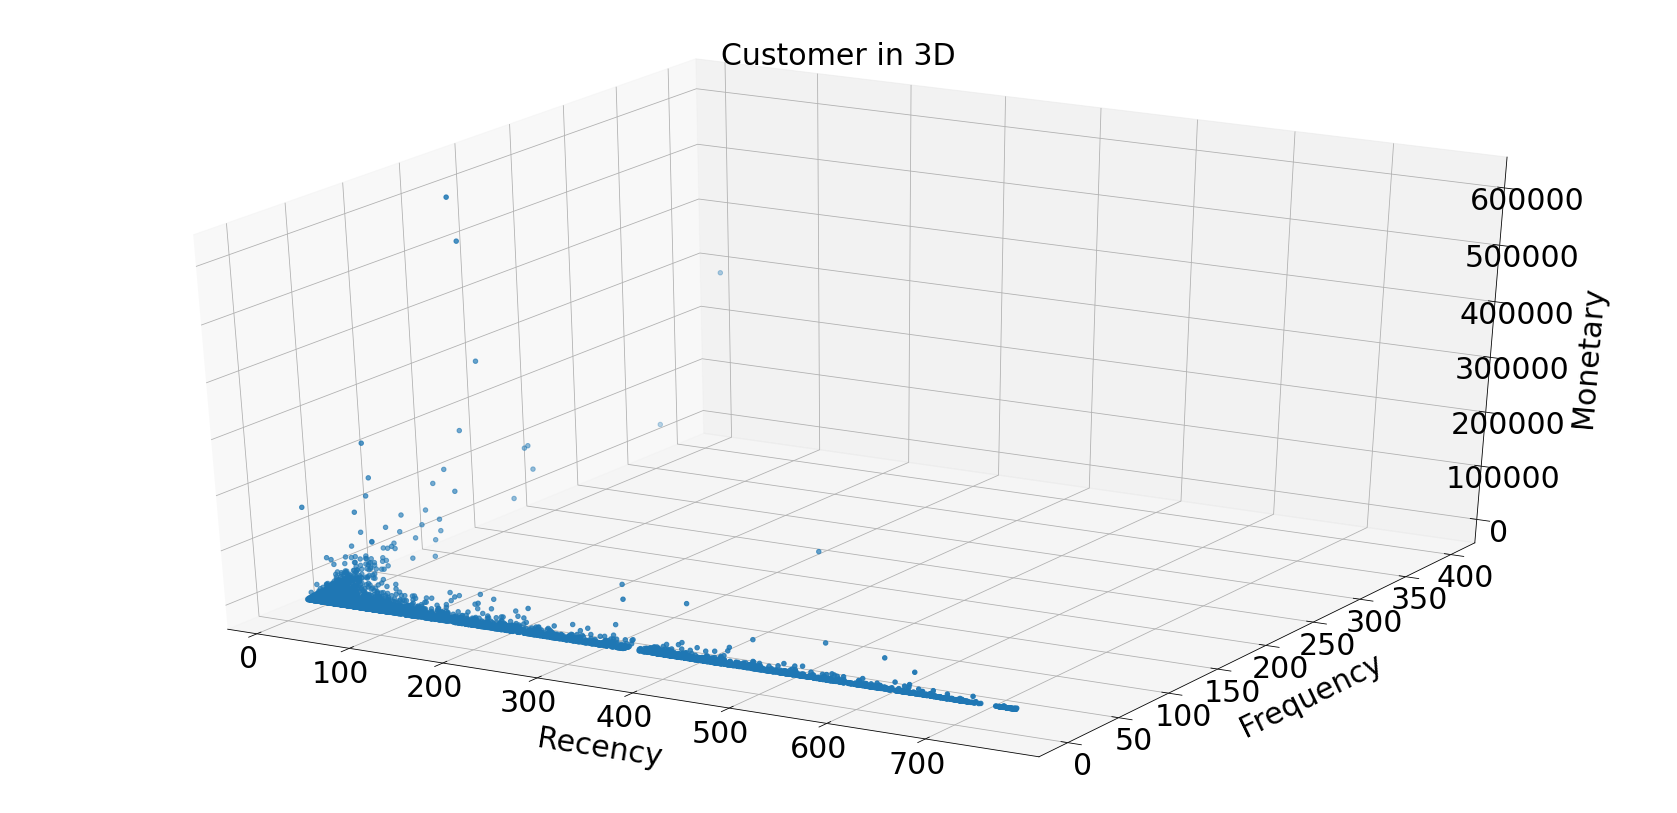

In [126]:
a = RFM['Recency']
b = RFM['Frequency']
c = RFM['Monetary']


fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(a, b, c)
ax.set_xlabel('\n\nRecency')
ax.set_ylabel('\n\nFrequency')
ax.set_zlabel('\n\n\nMonetary')
ax.dist = 10
plt.title('Customer in 3D')
plt.tight_layout()

In [130]:
scaler = StandardScaler()
#initiating a scaler object

RFM_scaled = scaler.fit_transform(RFM1)
#fitting dataframe with scaler 

RFM_scaled = pd.DataFrame(RFM_scaled, index = RFM.index, columns = ['RecencyScaled', 'FrequencyScaled','MonetaryScaled'])
#the fit_transform result will be a numpy array. this code converts the array into a DataFrame.

RFM_scaled

,RecencyScaled,FrequencyScaled,MonetaryScaled
Customer ID,,,
12346.0,0.592985,0.438998,5.058050
12347.0,-0.949988,0.131502,0.177431
12348.0,-0.601266,-0.099120,-0.067806
12349.0,-0.873556,-0.175994,0.095686
12350.0,0.521330,-0.406616,-0.182148
...,...,...,...
18283.0,-0.945211,1.207738,-0.019134
18284.0,1.099348,-0.406616,-0.173511
18285.0,2.193282,-0.406616,-0.175864


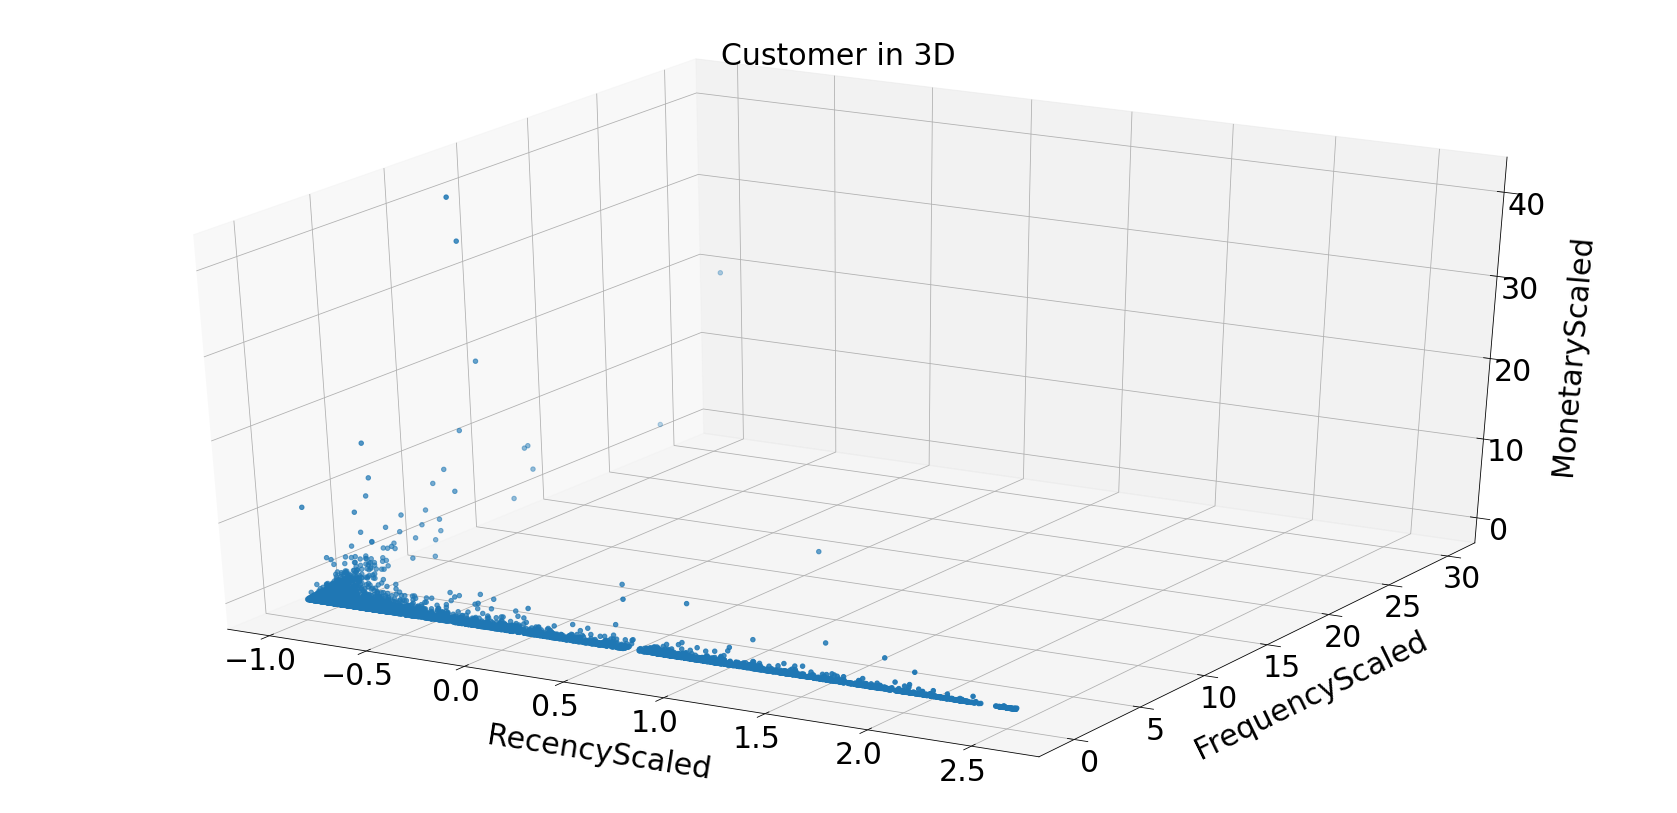

In [131]:
x = RFM_scaled['RecencyScaled']
y = RFM_scaled['FrequencyScaled']
z = RFM_scaled['MonetaryScaled']
#setting the values for x, y, z

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x, y, z)
ax.set_xlabel('\nRecencyScaled', linespacing = 3.1)
ax.set_ylabel('\n\nFrequencyScaled')
ax.set_zlabel('\n\nMonetaryScaled')
ax.dist = 10
plt.title('Customer in 3D')
plt.tight_layout()

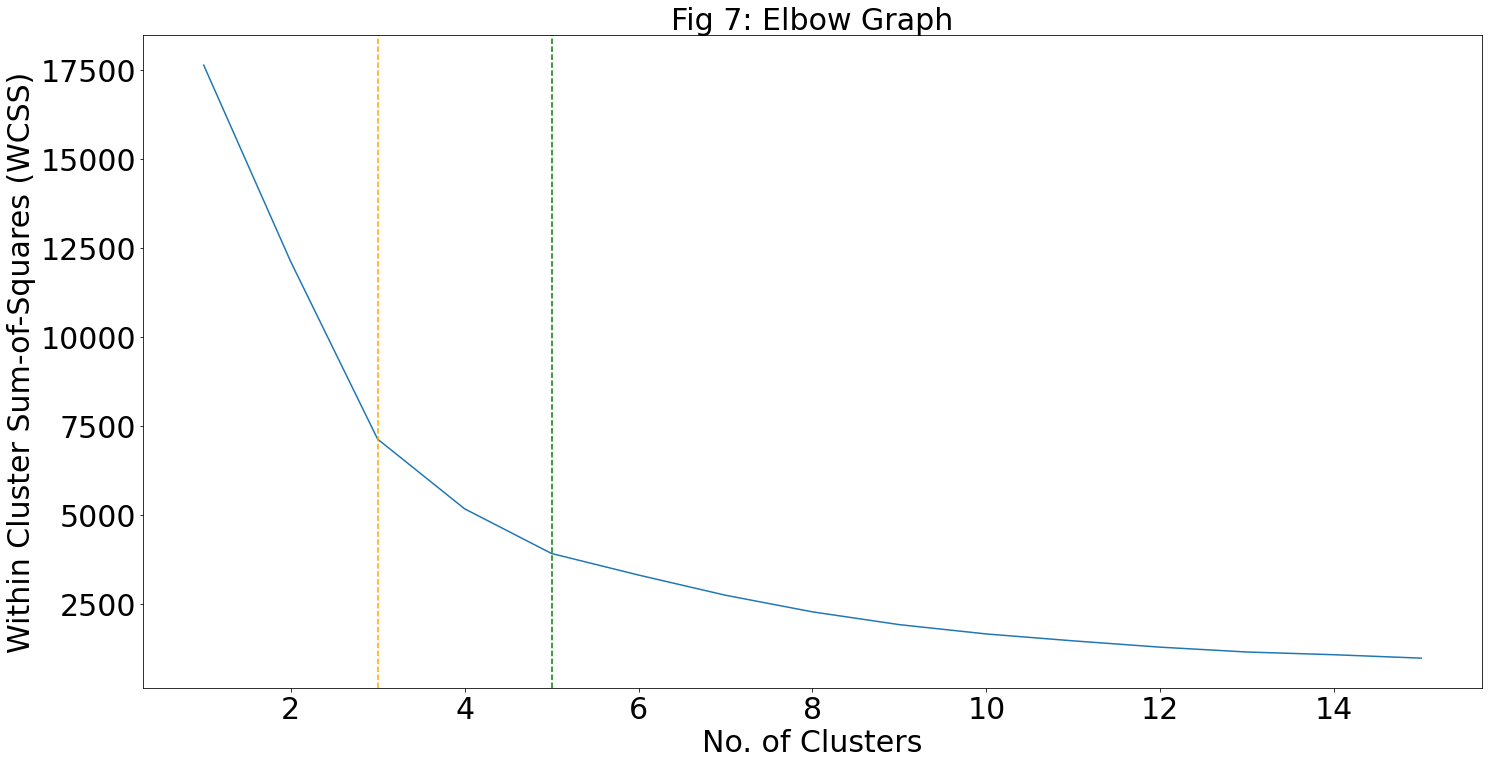

In [149]:
inertia = []
ks = np.arange(1,16)

for i in ks:
    model_i = KMeans(n_clusters = i)
    labels = model_i.fit_predict(RFM_scaled)
    inertia.append(model_i.inertia_)
    
#plot ks against inertia
plt.plot(ks, inertia)
plt.xlabel('No. of Clusters')
plt.ylabel('Within Cluster Sum-of-Squares (WCSS)')
plt.title('Fig 7: Elbow Graph')
plt.axvline(3, 0, 17500, label='Optimal No. of Clusters', c = 'orange', linestyle = 'dashed')
plt.axvline(5, 0, 17500, label='Optimal No. of Clusters', c = 'green', linestyle = 'dashed')

In [133]:
#create a KMeans instance with 5 clusters
model_5_clus = KMeans(n_clusters = 5)

#fit model and predict the labels for the new points
labels_5_clus = model_5_clus.fit_predict(RFM_scaled)

cluster_centers_5_clus = pd.DataFrame(model_5_clus.cluster_centers_)
cluster_centers_5_clus.iloc[:,0:3]
#getting the cluster centers

,0,1,2
0,-0.827681,1.709727,0.740784
1,1.291414,-0.316883,-0.153576
2,-0.946405,15.852235,29.438323
3,-0.855244,8.725375,6.643951
4,-0.599089,-0.090446,-0.075165


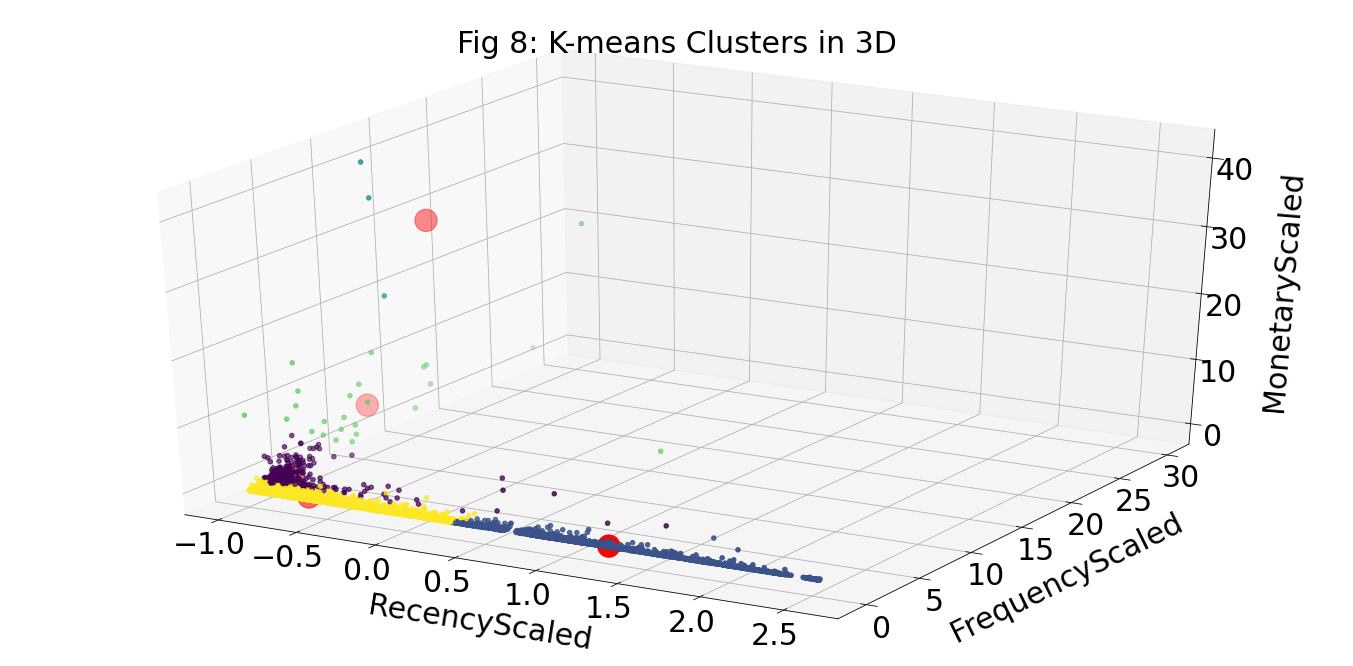

In [151]:
RFM_scaled_5_clus = RFM_scaled.copy()

x = RFM_scaled_5_clus['RecencyScaled']
y = RFM_scaled_5_clus['FrequencyScaled']
z = RFM_scaled_5_clus['MonetaryScaled']
#setting the values for x, y, z

RFM_scaled_5_clus['Labels'] = labels_5_clus

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z, c = labels_5_clus)
ax.set_xlabel('\n\nRecencyScaled')
ax.set_ylabel('\n\nFrequencyScaled')
ax.set_zlabel('\n\nMonetaryScaled')
plt.title('Fig 8: K-means Clusters in 3D')

ax.scatter(cluster_centers_5_clus[0], cluster_centers_5_clus[1], cluster_centers_5_clus[2], c = 'red', s = 500)


plt.show()

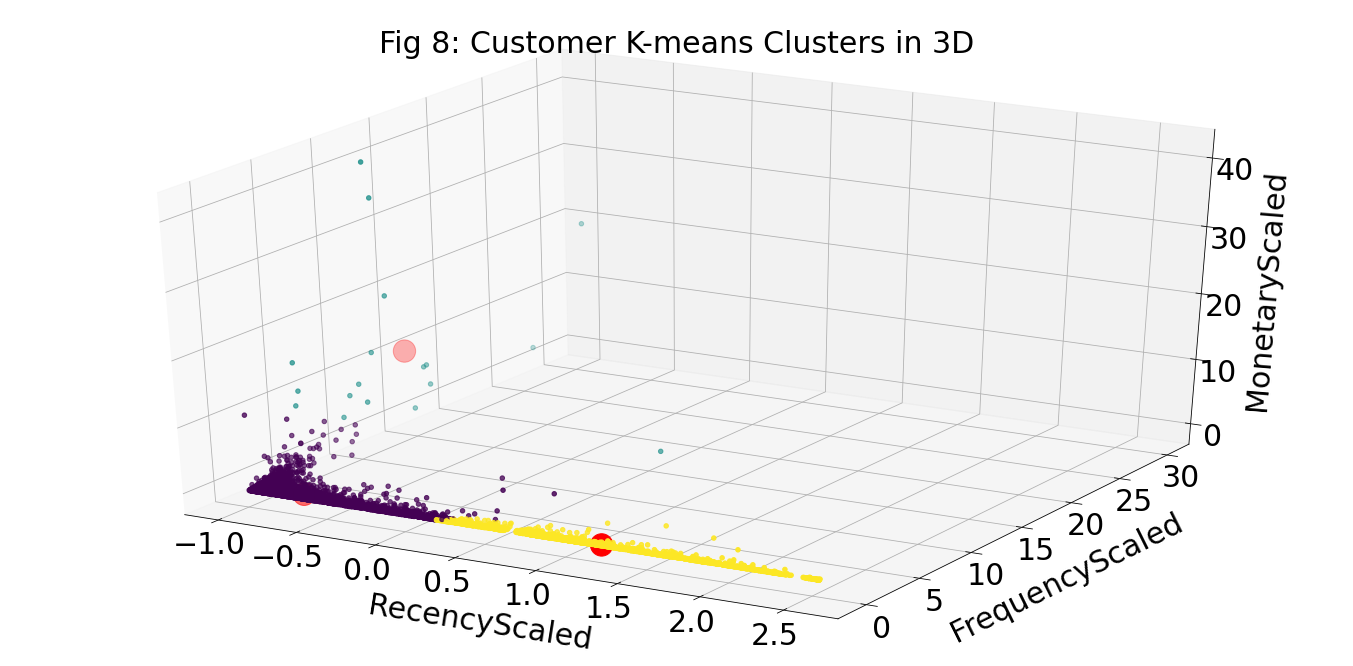

In [135]:
RFM_scaled_3_clus = RFM_scaled.copy()

#create a KMeans instance with 3 clusters
model_3_clus = KMeans(n_clusters = 3)

#fit model and predict the labels for the new points
labels_3_clus = model_3_clus.fit_predict(RFM_scaled_3_clus)

RFM_scaled_3_clus['Labels_3_clus'] = labels_3_clus
#append cluster labels to RFM_scaled dataframe

cluster_centers_3_clus = pd.DataFrame(model_3_clus.cluster_centers_)
cluster_centers_3_clus.iloc[:,0:3]
#getting the cluster centers

x = RFM_scaled_3_clus['RecencyScaled']
y = RFM_scaled_3_clus['FrequencyScaled']
z = RFM_scaled_3_clus['MonetaryScaled']
#setting the values for x, y, z

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z, c = labels_3_clus)
ax.set_xlabel('\n\nRecencyScaled')
ax.set_ylabel('\n\nFrequencyScaled')
ax.set_zlabel('\nMonetaryScaled')
plt.title('Fig 8: Customer K-means Clusters in 3D')

ax.scatter(cluster_centers_3_clus[0], cluster_centers_3_clus[1], cluster_centers_3_clus[2], c = 'red', s = 500, marker = 'o')

plt.show()

In [141]:
RFM_scaled_5_clus

,RecencyScaled,FrequencyScaled,MonetaryScaled,Labels
Customer ID,,,,
12346.0,0.592985,0.438998,5.058050,0
12347.0,-0.949988,0.131502,0.177431,4
12348.0,-0.601266,-0.099120,-0.067806,4
12349.0,-0.873556,-0.175994,0.095686,4
12350.0,0.521330,-0.406616,-0.182148,1
...,...,...,...,...
18283.0,-0.945211,1.207738,-0.019134,0
18284.0,1.099348,-0.406616,-0.173511,1
18285.0,2.193282,-0.406616,-0.175864,1


In [142]:
RFM_combined = pd.merge(RFM_scaled_5_clus, RFM['Segment'], on = 'Customer ID').sort_values(by = 'Customer ID', ascending = True)
RFM_combined

,RecencyScaled,FrequencyScaled,MonetaryScaled,Labels,Segment
Customer ID,,,,,
12346.0,0.592985,0.438998,5.058050,0,Can't Lose
12347.0,-0.949988,0.131502,0.177431,4,Champions
12348.0,-0.601266,-0.099120,-0.067806,4,Loyal Customers
12349.0,-0.873556,-0.175994,0.095686,4,Potential Loyalists
12350.0,0.521330,-0.406616,-0.182148,1,Hibernating
...,...,...,...,...,...
18283.0,-0.945211,1.207738,-0.019134,0,Champions
18284.0,1.099348,-0.406616,-0.173511,1,Hibernating
18285.0,2.193282,-0.406616,-0.175864,1,Hibernating


In [143]:
#create 5 dataframes for the clusters
cluster0 = RFM_combined[RFM_combined['Labels'] == 0]['Segment'].value_counts()
cluster1 = RFM_combined[RFM_combined['Labels'] == 1]['Segment'].value_counts()
cluster2 = RFM_combined[RFM_combined['Labels'] == 2]['Segment'].value_counts()
cluster3 = RFM_combined[RFM_combined['Labels'] == 3]['Segment'].value_counts()
cluster4 = RFM_combined[RFM_combined['Labels'] == 4]['Segment'].value_counts()

In [146]:
cluster0

Champions          261
Loyal Customers    113
Can't Lose           9
Name: Segment, dtype: int64

In [147]:
cluster1

Hibernating    1323
At Risk         554
Can't Lose       37
Name: Segment, dtype: int64

In [148]:
cluster2

Champions    4
Name: Segment, dtype: int64

In [144]:
cluster3

Champions              19
Loyal Customers         3
Potential Loyalists     1
Can't Lose              1
Name: Segment, dtype: int64

In [145]:
cluster4

Loyal Customers        1031
Potential Loyalists     712
Champions               568
About to Sleep          388
Need Attention          269
Hibernating             199
At Risk                 196
Promising               110
New Customers            56
Can't Lose               24
Name: Segment, dtype: int64